# Financial Fraud Dataset Overview

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import abline_plot
from random import sample 

In [3]:
#Read in raw finanical fraud dataset CSV
df = pd.read_csv("/Users/sa14/Desktop/FinancialFraudData_EDA/FinFraudData.csv")

In [24]:
#Get first 10 rows of the dataset
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
#Get the count of rows and columns for the dataset
df.shape

(6362620, 11)

**This raw dataset has 6,362,620 rows and 11 columns.**

In [ ]:
#Get index/rows of the dataset
df.index

RangeIndex(start=0, stop=6362620, step=1)

In [93]:
#Get overall count of null/NaN values in the dataset
nan_count = df.isnull().sum()

print("Null/NaN Value Count by Per Column")

nan_count

Null/NaN Value Count by Per Column


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**This dataset does not contain any null values across all 11 columns.**

In [ ]:
#Describe the summary statistics of each numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#Determine the descriptive statistics of the dataset such as the mean, median, percentiles, etc.
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Univariate Analysis

In [176]:
#Examine the nameOrig column to determine amount of accounts that have only initiated 1 transaction
one_time_acc = df["nameOrig"].drop_duplicates()
one_time_acc.value_counts()


#There are 6,353,307 accounts that have initiated 1 transaction at this bank

nameOrig
C1231006815    1
C1321016348    1
C1041348730    1
C1414646158    1
C1441203994    1
              ..
C1789356502    1
C1771722763    1
C2064983364    1
C1286206204    1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [166]:
#Examine the nameOrig column for unique value count and possible patterns

name_count = df["nameOrig"].value_counts(ascending=False)
all_freq_trans = name_count[name_count > 1].sort_values(ascending=False) 

#There are 9298 accounts that have conducted either 2 or 3 transactions

<bound method Series.to_frame of nameOrig
C1902386530    3
C2098525306    3
C363736674     3
C1530544995    3
C1065307291    3
              ..
C1001770944    2
C800314762     2
C365690312     2
C970779252     2
C591135740     2
Name: count, Length: 9298, dtype: int64>

**Of the 6,362,620 total transactions performed at this bank, only 9,298 accounts have initiated more than 1 transaction.** 

* 15 accounts have initiated 3 transactions
* 9283 accounts have initiated 2 transactions
* There are 6,353,307 accounts that have initiated 1 transaction at this bank and compose the overwhelming majority


In [171]:
#Isolate accounts that have initiated more than 2 transactions
name_count = df["nameOrig"].value_counts(ascending=False)
max_transac = name_count[name_count > 2].sort_values(ascending=False) 

max_transac #15 accounts have initiated 3 transactions

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
C1832548028    3
C1976208114    3
C2051359467    3
C1065307291    3
C1530544995    3
Name: count, dtype: int64

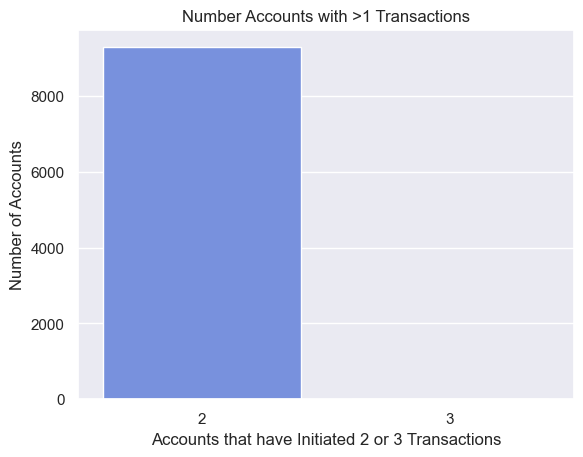

In [167]:
#Create countplot to visualize frequency of accounts that have conducted more than 1 transaction with this bank
sns.set_palette("coolwarm") 
sns.countplot(data = df , x= all_freq_trans)
plt.xlabel('Accounts that have Initiated 2 or 3 Transactions')
plt.ylabel('Number of Accounts')

plt.title('Number Accounts with >1 Transactions')
plt.show()

> #### Pre-Existing Information about the *"nameOrig"* column 
>
It is a string that represents the origin account name.


> #### *nameOrig* column initial analysis
>
**Of the 6,362,620 total transactions performed at this bank, only 9,298 accounts have initiated more than 1 transaction.** 

* 15 accounts have initiated 3 transactions
* 9283 accounts have initiated 2 transactions

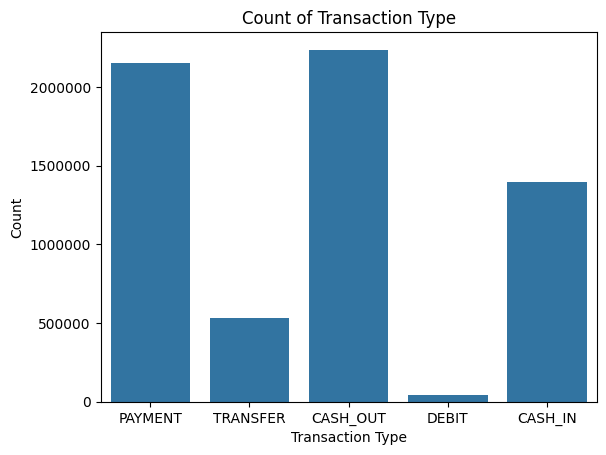

In [40]:
#Create bar graph for univariate analysis of the count of the types of transactions
sns.countplot(data=df, x='type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

#Remove scientfic notation from y axis 
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.title('Count of Transaction Type')
plt.show()

In [41]:
#Get count of unique transactions labeled isFraud
isfraud_count = df["isFraud"].value_counts()

#Convert isfraud_count to a dataframe
isfraud_count.to_frame()

,count
isFraud,
0,6354407
1,8213


In [107]:
#Display the proporion of transactions flagged as Not Fraud or Fraud
isfraud_prop = df["isFraud"].value_counts(normalize=True)

#Convert the flagged_prop series into a dataframe
isfraud_prop.to_frame()

,proportion
isFraud,
0,0.998709
1,0.001291


> #### Pre-Existing Information about the *"IsFraud"* Column 
>
Was this simulated transaction actually fraudulent? In this case, we consider “fraud” to be a malicious transaction that aimed to transfer funds out of a victim’s bank account before the account owner could secure their information. 
* 0 =  Indicates that the transaction is *not* fraud
* 1 = Indicates that the transaction *is* fraud


> #### *IsFraud* Column Initial Analysis
>
There are 6,354,407 total **non-fradulent** transactions out of 6,362,620 overalls transactions. 

There are 8,213 total **fraudlent** transactions out of 6,362,620 overall transactions.

**Only 0.0001291% of all transactions are fradulent.**

99.87% of all transactions are not fraudulent. 

In [79]:
#Get count of unique transactions labeled isFlaggedFraud
flagged_count = df["isFlaggedFraud"].value_counts()

#Turn the flagged_count series into a dataframe
flagged_count.to_frame()

,count
isFlaggedFraud,
0,6362604
1,16


In [113]:
#Display the proporion of transactions flagged as Not Fraud or Fraud
flagged_prop = df["isFlaggedFraud"].value_counts(normalize=True)

#Convert the flagged_prop series into a dataframe
flagged_prop.to_frame()

,proportion
isFlaggedFraud,
0,0.999997
1,0.000003


> #### Pre-Existing Information about the *"IsFlaggedFraud"* column 
>
A “naive” model that simply flags a transaction as fraudulent if it is greater than 200,000 (note that this currency is not USD) 
* 0 =  Indicates that the transaction has been *not* flagged as fraud
* 1 = Indicates that the transaction *has* been flagged as fraud

> #### *IsFlaggedFraud* column initial analysis
>
 There are 6,362,604 total transactions flagged as **not** fraudlent out of 6,362,620 overalls transactions. 99.9% of transactions were not classified/flagged as fraud.
 
There are only *16* total fraudlent transactions out of 6,362,620 overall transactions. **These flagged fraud transactions make up just 0.0003% of the dataset.**

[Text(0.5, 1.0, 'Frequency of Transactions by Step'),
 Text(0.5, 0, 'Step (Representation of Time)'),
 Text(0, 0.5, 'Transaction Count')]

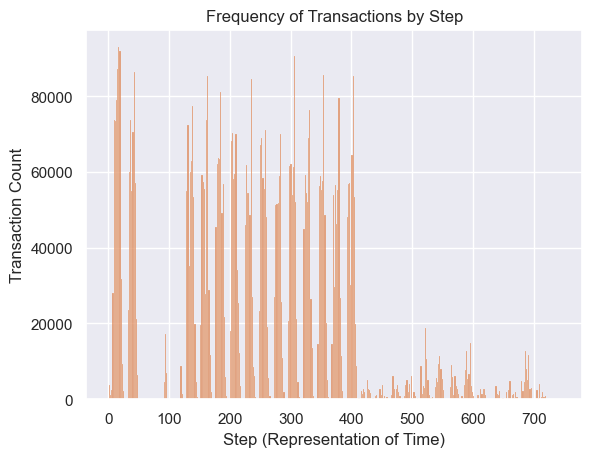

In [69]:
#Create histogram that analyzes the frequency of transactions by step

sns.set_theme(style="darkgrid")
sns.histplot(bins=30)
sns.histplot(df["step"]).set(title="Frequency of Transactions by Step", xlabel="Step (Representation of Time)", ylabel= "Transaction Count")


> #### Pre-Existing Information about the *"Step"* column 
> 
>> A unit of time that represents hours in the dataset. Think of this as the timestamp of the transaction (e.g. hour 1, hour 2, … hour 534, …) 

> #### *"Step"* Column Initial Analysis 

>> * More transactions (both flagged-fraud and non-fraud) occur overall between Step 1 and approximately Step 50.
>> * The majority of transactions occur between Step 150 and Step 400
>> * Step 100 and Steps 500 - 743 have the least amount of overall transactions


## Bivariate Analysis